**Load dataset**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv("data.csv", index_col='ID')
df = data.copy()

**Task 1 (1 point)**. Built a histogram of the height distribution in *meters* from footbal player data. Remember that height is in format *feet* '*inches*.  Instead of filling null values with some constant just drop them. Use *.dropna* for specified column.

Checking column type

In [57]:
print(f"Weight column type is '{data['Weight'].dtype}'")
print(f"Height column type is '{data['Height'].dtype}'")

Weight column type is 'object'
Height column type is 'object'


Droping null values

In [58]:
data.dropna(subset=['Height'],inplace=True)
data['Height'].size

18159

Defining method to parse feet'inches to inches

In [59]:
FT_TO_INCH = 12
INCH_TO_M = 2.54/100
def parse_ht(ht):
    in_=0
    # format: 7' 0.0"
    ht_ = str(ht).split("'")
    ft_ = float(ht_[0])
    if ht_.__len__()==1: in_=0
    else: in_=ht_[1]
    in__ = float(in_)
    return (FT_TO_INCH*ft_) + in__

Format Height column from feet' inches to meter

In [60]:
data['Height_m'] = data["Height"].apply(lambda x:parse_ht(x)*INCH_TO_M)
data['Height_m'].median()

1.8034

In [61]:
data.head(100).T

ID,158023,20801,190871,193080,192985,183277,177003,176580,155862,200389,...,189513,187961,186153,184941,184267,183907,181872,181458,180930,179846
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak,...,Parejo,Paulinho,W. Szczęsny,A. Sánchez,Y. Brahimi,J. Boateng,A. Vidal,I. Perišić,E. Džeko,S. Khedira
Age,31,33,26,27,27,27,32,31,32,25,...,29,29,28,29,28,29,31,29,32,31
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/players/4/19/183277.png,https://cdn.sofifa.org/players/4/19/177003.png,https://cdn.sofifa.org/players/4/19/176580.png,https://cdn.sofifa.org/players/4/19/155862.png,https://cdn.sofifa.org/players/4/19/200389.png,...,https://cdn.sofifa.org/players/4/19/189513.png,https://cdn.sofifa.org/players/4/19/187961.png,https://cdn.sofifa.org/players/4/19/186153.png,https://cdn.sofifa.org/players/4/19/184941.png,https://cdn.sofifa.org/players/4/19/184267.png,https://cdn.sofifa.org/players/4/19/183907.png,https://cdn.sofifa.org/players/4/19/181872.png,https://cdn.sofifa.org/players/4/19/181458.png,https://cdn.sofifa.org/players/4/19/180930.png,https://cdn.sofifa.org/players/4/19/179846.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium,Belgium,Croatia,Uruguay,Spain,Slovenia,...,Spain,Brazil,Poland,Chile,Algeria,Germany,Chile,Croatia,Bosnia Herzegovina,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GKKicking,15,15,15,87,5,6,7,31,9,78,...,12,11,71,15,12,15,4,10,13,5
GKPositioning,14,14,15,88,10,8,14,33,7,88,...,14,6,85,12,7,6,2,9,15,15
GKReflexes,8,11,11,94,13,8,9,37,11,89,...,8,8,87,13,7,5,4,6,15,8
Release Clause,€226.5M,€127.1M,€228.1M,€138.6M,€196.4M,€172.1M,€137.4M,€164M,€104.6M,€144.5M,...,€77.7M,NaN,€55.2M,€69.4M,€78M,€49.5M,€53.3M,€63.8M,€51.9M,€54.5M


Building a histogram of the height distribution in meters from footbal player data

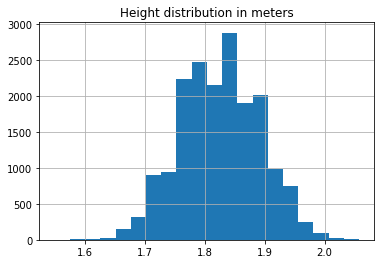

In [62]:
data.hist(column='Height_m', bins=20)
plt.title('Height distribution in meters')
plt.show()

Defining method to parse weight to float

In [63]:
import re
POUND_TO_KILO = 0.454

def parse_wt(wt):
    return float(re.search('([0-9]+)',wt).group(0))

Format Weight column to float type and to kg.

In [64]:
data['Weight_kg'] = data['Weight'].apply(lambda x: parse_wt(x) * POUND_TO_KILO)

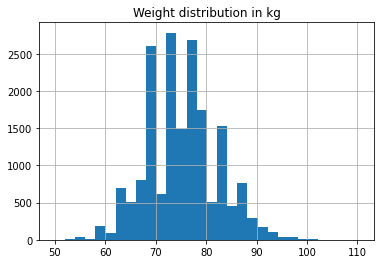

In [65]:
data.hist(column='Weight_kg', bins=30)
plt.title('Weight distribution in kg')
plt.show()

**Task 2 (0.5 point).** Write your own function for MSE calculation using the formula above. Calculate train and test MSE, compare to built-in method (sklearn.metrics.mean_squared_error)

Sampling data for calculation check

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics

In [67]:
data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [68]:
lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0)

In [69]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [70]:
def mse(y_true, y_pred):
    return np.mean((y_true- y_pred)**2)

In [71]:
from sklearn.metrics import mean_squared_error

assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)

In [72]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 33.51425405667062, test MSE 30.759776928274732


**Task 3 (1.5 points).** Visualize the dependence of **test** _BallControl_ predictions and real _BallControl_ score on _Dribbling_ score. Don't forget to add axis and plot names!

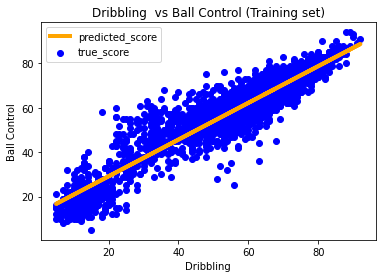

In [73]:
plt.title('Dribbling  vs Ball Control (Training set)')
plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred_test, color = 'orange',linewidth=4)
plt.legend(('predicted_score','true_score'),
           loc='upper left')
plt.show()

**Task 4 (5 points).** Implement your own Linear Regression class for any number of input features and settable boolean parameter *fit_intercept*.

In this task you will work with _optimize_ module of [_scipy_](https://docs.scipy.org/doc/scipy/reference/) open-source library for mathematics, science, and engineering. You will need a function [_least_squares_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) that finds a coefficients for linear regression by minimizing the sum of the squares of the residuals (which is equivalent to MSE minimizing). More information about least squares approach [here](https://en.wikipedia.org/wiki/Least_squares). <br><br>
Even though this function has many parameters, you need only a few of them to complete the task (the rest will be filled in with default values automatically).
- **fun** computes a vector of residuals given weights, features and target, we provide you a function template _compute_residuals_
- **x0** this is an initial weights vector. You can either pass a vector of zeros[n_features] or fill in randomly.
- **args** are fixed arguments to _fun_ function (which we are not going to optimize). In that particular case you will need to pass X and y.


You can access optimized weights by accessing the field **.x** of object which returns by this function.

!!! IMPORTANT 
Please complete this assignment without any cycles. You may use the standard operations of matrix \ vector multiplication ans different statistic calculation with NumPy. Otherwise, your solution may not go through asserts.

Let's introduce one more method linear_prediction to calculate predicting y_hat as matrix product of X and transposed w

In [74]:
def linear_prediction(X, w):
    return np.dot(X, w)

def compute_residuals(w, X, y):
    """
    Compute residuals when predicting y_hat as matrix product of X and transposed w
    :param w: linear regression weights, numpy.ndarrya: float64[num_features]
    :param X: training features, numpy.ndarray: float64[num_samples, num_features]
    :param y: training target, numpy.ndarray: float64[num_samples]
    :returns: vector of residuals (y_i_hat - y_i) for each sample_i in X
    
    """
    residuals=linear_prediction(X, w) - y
    return residuals

In [75]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import least_squares

class LinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        """
        fit model weights given input features and target
        :param X: training features, numpy.ndarray: numeric[num_samples, num_features]
        :param y: training target, numpy.ndarray: numeric[num_samples]
        :returns: linear predictor with fitted weights so that train MSE is the lowest possible
        :note: weights: numpy.ndarray: float64[num_features] stored as class field

        """
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Save train data information. Necessary for following the uniform API
        self.X_ = X
        self.y_ = y
        self.n_features_in_ = X.shape[1]
        
        # Copy arrays and cast them to uniform type
        X_train = X.astype('float64')
        y_train = y.astype('float64')
        
        # Add dummy column of ones to X_train if we want to train an intercept - last component of future weight vector
        if self.fit_intercept:
            X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
        
        # Your code here.
        # Just follow the suggested steps: create initial weights vector,
        # apply least_squares optimizer passing the parameters described above
        # and finally extract optimized weights.
        # Remember: you need to distinguish coefficients from intercept when fit_intercept=True
        
        ## Entering initial zero weights 
        w0=np.zeros(X_train.shape[1])
        ## Calculationg optimized weights
        w=least_squares(compute_residuals,w0,args=(X_train ,y_train)).x
        
        self.intercept_=0  
        if self.fit_intercept: 
            self.coef_=w[:-1] 
            self.intercept_ = w[-1]
        else: self.coef_ = w
        
        # Return the classifier
        return self
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        return X.dot(self.coef_) + self.intercept_

In [76]:
#Testing area
from sklearn.utils.estimator_checks import check_estimator
from sklearn.linear_model import Ridge

lr = LinearRegression()
ridge = Ridge(alpha=0)
lr_no_intercept = LinearRegression(fit_intercept=False)
ridge_no_intercept = Ridge(alpha=0, fit_intercept=False)

#Check compatibility with Sklearn framework and apply some spesific internal tests
check_estimator(lr)
check_estimator(lr_no_intercept)

#Compare model accuracy with Ridge(0) from Sklearn
data.fillna({'BallControl': data['BallControl'].mean()
             , 'Dribbling': data['Dribbling'].mean()
             , 'Strength': data['Strength'].mean()}, inplace=True)
X_sample, y_sample = data[['Dribbling', 'Strength']], data['BallControl']
lr.fit(X_sample, y_sample)
ridge.fit(X_sample, y_sample)
assert np.allclose(lr.predict(X_sample), ridge.predict(X_sample), rtol=1e-03), "Your model with intercept not accurate enough!"
lr_no_intercept.fit(X_sample, y_sample)
ridge_no_intercept.fit(X_sample, y_sample)
assert np.allclose(lr_no_intercept.predict(X_sample), ridge_no_intercept.predict(X_sample), rtol=1e-03), "Your model without intercept not accurate enough!"

**Task 5 (up to 5 points).** Build a Linear Regression model for _Value_ prediction for every football player and validate it. You **have to** use either your custom Linear Regression class or `sklearn.linear_model.Ridge` with regularization param alpha=0. Steps you need to follow:
- Extract float number from _Value_ field in DataFrame (**0.5 points**)
- Сhoose more features that you expect to influence on player _Value_ (at least 10)
- Plot feature correlation matrix. (**0.5 points**)
- Drop features that are highly correlated with each other (_abs_(corr) > 0.9) one by one until no correlated pairs left. _Hint_: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (**1.5 points**)
- Split data into train/test with some proportion (**0.5 points**)
- Train a model on train dataset, make predictions both for train and test. (**0.5 points**)
- Measure the model quality in terms of MSE in train and test samples,  (**0.5 points**)
- Write a short report about the work done. Why did you take these particular features? Can you find a logical explanation for high correlation of some of your features? Are you satisfied with the quality of predictions? etc. (**1 point**)

**Penalties**
- **-1 point** if used a different model besides custom Linear Regression or `sklearn.linear_model.Ridge` with regularization param alpha=0
- **-0.5 points** if number of selected features BEFORE removal of linearly dependent ones is less than 10.
- **-0.5 points** if did not remove linearly dependent features before training the model.

**Investigating columns info**

In [77]:
import seaborn as sns
%matplotlib inline
# import pandasql as ps # used for research

First lets's study columns meaning on source page  https://sofifa.com

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  

In [79]:
df.head(100).T

ID,158023,20801,190871,193080,192985,183277,177003,176580,155862,200389,...,189513,187961,186153,184941,184267,183907,181872,181458,180930,179846
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak,...,Parejo,Paulinho,W. Szczęsny,A. Sánchez,Y. Brahimi,J. Boateng,A. Vidal,I. Perišić,E. Džeko,S. Khedira
Age,31,33,26,27,27,27,32,31,32,25,...,29,29,28,29,28,29,31,29,32,31
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/players/4/19/183277.png,https://cdn.sofifa.org/players/4/19/177003.png,https://cdn.sofifa.org/players/4/19/176580.png,https://cdn.sofifa.org/players/4/19/155862.png,https://cdn.sofifa.org/players/4/19/200389.png,...,https://cdn.sofifa.org/players/4/19/189513.png,https://cdn.sofifa.org/players/4/19/187961.png,https://cdn.sofifa.org/players/4/19/186153.png,https://cdn.sofifa.org/players/4/19/184941.png,https://cdn.sofifa.org/players/4/19/184267.png,https://cdn.sofifa.org/players/4/19/183907.png,https://cdn.sofifa.org/players/4/19/181872.png,https://cdn.sofifa.org/players/4/19/181458.png,https://cdn.sofifa.org/players/4/19/180930.png,https://cdn.sofifa.org/players/4/19/179846.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium,Belgium,Croatia,Uruguay,Spain,Slovenia,...,Spain,Brazil,Poland,Chile,Algeria,Germany,Chile,Croatia,Bosnia Herzegovina,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GKHandling,11,11,9,85,13,12,9,25,8,92,...,9,16,81,10,16,12,2,7,11,9
GKKicking,15,15,15,87,5,6,7,31,9,78,...,12,11,71,15,12,15,4,10,13,5
GKPositioning,14,14,15,88,10,8,14,33,7,88,...,14,6,85,12,7,6,2,9,15,15
GKReflexes,8,11,11,94,13,8,9,37,11,89,...,8,8,87,13,7,5,4,6,15,8


From the first glance, we will not need following columns

In [80]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Loaned From','Release Clause','Joined','Jersey Number','Real Face'],axis=1,inplace=True)

Let's save list of all rest columns, numeric columns and object columns

In [81]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
list_all_col=df.columns.values
list_numerics_col=df.select_dtypes(include=numerics).columns.values
list_object_col=np.setxor1d(list_all_col,list_numerics_col)

Next list 'list_object_shortened_col' is without following columns 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'.
As mentioned columns contains info on qualitis of players on certain positions, and could be received from rest columns. 

In [82]:
list_object_shortened_col=[]
for i in list_object_col: 
    if len(str(i))>3:
        list_object_shortened_col=np.append(list_object_shortened_col,i)

In [83]:
list_object_shortened_col

array(['Body Type', 'Club', 'Contract Valid Until', 'Height', 'Name',
       'Nationality', 'Position', 'Preferred Foot', 'Value', 'Wage',
       'Weight', 'Work Rate'], dtype='<U32')

Let's convert object columns from **'list_object_shortened_col'** except of Name to numeric type

In [84]:
df.groupby('Body Type')['Body Type'].size()

Body Type
Akinfenwa                  1
C. Ronaldo                 1
Courtois                   1
Lean                    6417
Messi                      1
Neymar                     1
Normal                 10595
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Stocky                  1140
Name: Body Type, dtype: int64

In [85]:
Body_Type_group = {'Lean': ['Lean'],
                   'Normal': ['Normal'],
                   'Stocky': ['Stocky'],
                   'Unique': ['Akinfenwa', 'C. Ronaldo', 'Courtois', 'Messi', 'Neymar', 'PLAYER_BODY_TYPE_25',
                              'Shaqiri']}

In [86]:
for key, value in Body_Type_group.items():
    df[key] = df['Body Type'].isin(value).astype(int)

In [87]:
df.groupby('Preferred Foot')['Preferred Foot'].size()

Preferred Foot
Left      4211
Right    13948
Name: Preferred Foot, dtype: int64

In [88]:
Preferred_Foot_group={'Left':['Left'],
'Right':['Right']}

In [89]:
for key, value in Preferred_Foot_group.items():
    df[key] = df['Preferred Foot'].isin(value).astype(int)

In [90]:
df.groupby('Work Rate')['Work Rate'].size()

Work Rate
High/ High        1015
High/ Low          699
High/ Medium      3173
Low/ High          439
Low/ Low            34
Low/ Medium        449
Medium/ High      1690
Medium/ Low        850
Medium/ Medium    9810
Name: Work Rate, dtype: int64

In [91]:
Work_Rate_group = {'High': [2],
                   'Medium': [1],
                   'Low': [0]}

In [92]:
df[['Work Rate1','Work Rate2']] = df['Work Rate'].str.split('/ ',1,expand=True)

In [94]:
# df[['Work Rate_1']]=df.replace({'Work Rate1':Work_Rate_group})['Work Rate1']

In [95]:
# df[['Work Rate_2']]=df.replace({'Work Rate2':Work_Rate_group})['Work Rate2']

In [96]:
Age_group = {'young': [16, 17, 18, 19],
             'mature': np.arange(start=20, stop=31, step=1),
             'masters': np.arange(start=31, stop=100, step=1)}

In [97]:
for key, value in Age_group.items():
    df[key] = df['Age'].isin(value).astype(int)

In [98]:
Position_group = {'forward2': ['LS', 'ST', 'RS'],
                  'forward1': ['LW', 'LF', 'CF', 'RF', 'RW'],
                  'halfback2': ['LAM', 'CAM', 'RAM'],
                  'halfback1': ['LM', 'LCM', 'CM', 'RCM', 'RM'],
                  'back2': ['LWB', 'LDM', 'CDM', 'RDM', 'RWB'],
                  'back1': ['LB', 'LCB', 'CB', 'RCB', 'RB'],
                  'goalkeeper': ['GK']}

In [99]:
for key, value in Position_group.items():
    df[key] = df['Position'].isin(value).astype(int)

In [100]:
df['term_left'] = df.apply(lambda x: int(str(x['Contract Valid Until'])[-4:])-2018 if len(str(x['Contract Valid Until']))>3 else 0, axis=1)
df.groupby(by='term_left')['term_left'].size()

term_left
0    1321
1    5920
2    4044
3    4360
4    1477
5    1053
6      23
7       7
8       2
Name: term_left, dtype: int64

In [101]:
Rating_group = {'PAC': [['Acceleration', 'SprintSpeed'], ['GKDiving']],
                'SHO': [['Positioning', 'Finishing', 'ShotPower', 'LongShots', 'Penalties', 'Volleys'], ['GKHandling']],
                'PAS': [['Vision', 'Crossing', 'FKAccuracy', 'ShortPassing', 'LongPassing', 'Curve'], ['GKKicking']],
                'DRI': [['Agility', 'Balance', 'Reactions', 'BallControl', 'Dribbling', 'Composure'], ['GKReflexes']],
                'DEF': [['Interceptions', 'HeadingAccuracy', 'Marking', 'StandingTackle', 'SlidingTackle'],
                        ['SprintSpeed']],
                'PHY': [['Jumping', 'Stamina', 'Strength', 'Aggression'], ['GKPositioning']]}

In [102]:
for key, value in Rating_group.items():
    df[key] = df.apply(lambda x: x[value[0]].mean() if x['goalkeeper'] == 0 else x[value[1]].mean(), axis=1)

**5.1. Extracting float number from Value field in DataFrame**

Parsing Value so that we can interpret them 

In [103]:
def value_to_float(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value
        elif suffix == 'K':
            value = value /1_000
    except ValueError:
        value = 0
    return value

df['Value_mio'] = df['Value'].apply(value_to_float)
df['Wage_k'] = df['Wage'].apply(value_to_float)*1000

Lets look on distribution of players value

Text(0.5, 1.0, 'Player value distribution in mio')

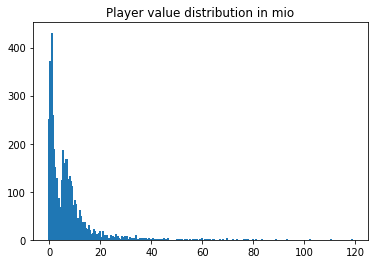

In [104]:
distr = df.groupby('Value_mio')['Value_mio'].count()
plt.bar(distr.index, distr.values)
plt.title('Player value distribution in mio')

**Collecting all features to list_to_analyse and list_to_analyse_X**

In [105]:
add_values = ['Lean', 'Normal', 'Stocky', 'Unique',
              'Left', 'Right',
              #'Work Rate_1', 'Work Rate_2',
              'young', 'mature', 'masters',
              'forward2', 'forward1', 'halfback2', 'halfback1', 'back1', 'back2', 'goalkeeper',
              'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
              'term_left', 'Wage_k']
list_to_analise_X = np.append(list_numerics_col, add_values)
add_values = ['Value_mio']
list_to_analise = np.append(list_to_analise_X, add_values)

In [106]:
for i in list_to_analise: df.fillna({i: df[i].mean()}, inplace=True)

In [107]:
df[list_to_analise].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18207.0,25.122206,4.669943,16.00,21.00,25.000,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.00,62.00,66.000,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.00,67.00,71.000,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.00,1457.00,1635.000,1787.0,2346.0
International Reputation,18207.0,1.113222,0.393511,1.00,1.00,1.000,1.0,5.0
...,...,...,...,...,...,...,...,...
DEF,18207.0,50.574844,15.254513,12.00,37.00,52.800,63.0,90.2
PHY,18207.0,64.520775,8.862139,32.75,58.75,65.250,71.0,90.0
term_left,18207.0,2.112594,1.311883,0.00,1.00,2.000,3.0,8.0
Wage_k,18207.0,9.731312,21.999290,0.00,1.00,3.000,9.0,565.0


In [108]:
df.isnull().sum()

Name           0
Age            0
Nationality    0
Overall        0
Potential      0
              ..
DRI            0
DEF            0
PHY            0
Value_mio      0
Wage_k         0
Length: 106, dtype: int64

In [109]:
df.dropna(subset=list_to_analise,inplace=True)

In [110]:
df[df['Value_mio'].isnull()]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,goalkeeper,term_left,PAC,SHO,PAS,DRI,DEF,PHY,Value_mio,Wage_k
ID,,,,,,,,,,,,,,,,,,,,,


**5.2. Plot feature correlation matrix.**

Feature correlation matrix


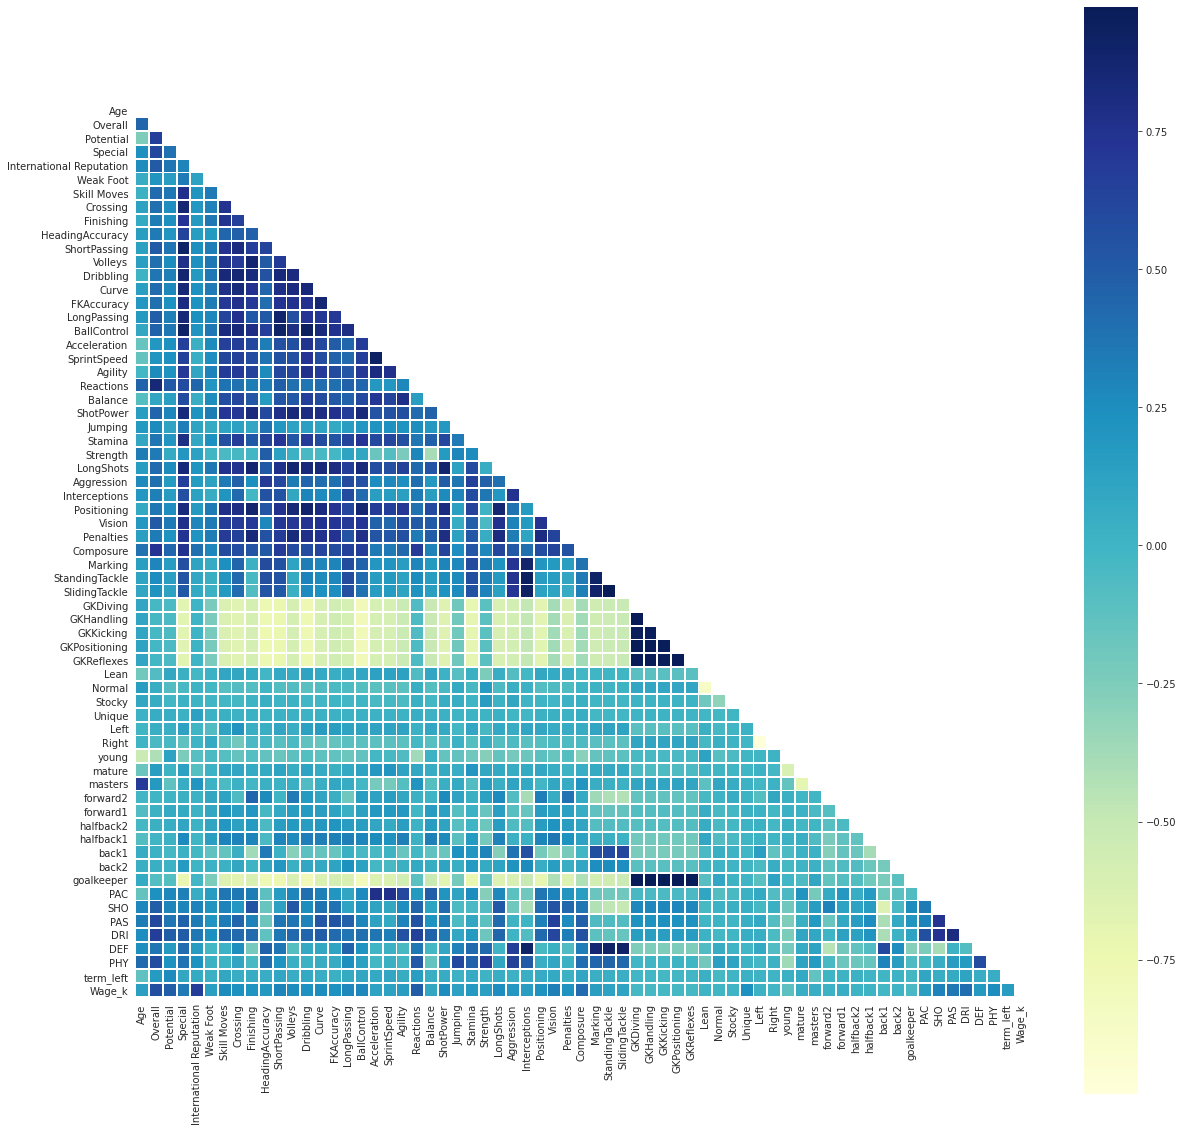

In [111]:
corr = df[list_to_analise_X].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")
    
print('Feature correlation matrix')

**5.3. Drop features that are highly correlated with each other (abs(corr) > 0.9) one by one until no correlated pairs left. Hint: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection. (1.5 points)**

Defining method to calculate absolute correlation between features in list

In [112]:
def feature_correl_calc (feature_list): 
    num_cols=len(df[feature_list].columns)
    feature_correl=pd.DataFrame(df[feature_list].corr(method="pearson").abs().unstack().sort_values(ascending=False)[num_cols:][::2].reset_index())
    feature_correl.columns = ['Feat1','Feat2','correlation']
    return feature_correl

In [113]:
feature_correl_calc(list_to_analise_X)

,Feat1,Feat2,correlation
0,Left,Right,0.992642
1,goalkeeper,GKDiving,0.975035
2,StandingTackle,SlidingTackle,0.974659
3,goalkeeper,GKReflexes,0.974406
4,goalkeeper,GKHandling,0.973759
...,...,...,...
2075,ShortPassing,Stocky,0.000770
2076,Wage_k,Lean,0.000717
2077,DRI,Aggression,0.000686
2078,International Reputation,GKKicking,0.000651


It is expected that Left and Right will have correlation like 1.0 as it is the same feature

Defining method to exlude features one by one until absolute correlation in list are higher than input coefficient

In [114]:
def exlude_feature_by_correl_coef(list_to_analise_X,list_exluded_features,coef):
    if feature_correl_calc(list_to_analise_X)["correlation"][0]<=coef:
        return list_to_analise_X,list_exluded_features
    else:
        f=feature_correl_calc(list_to_analise_X)
        a=f[(f["correlation"] >coef)]["Feat1"][0]
        list_to_analise_X=np.setxor1d(list_to_analise_X,a)
        list_exluded_features=np.append(list_exluded_features,a)
        return exlude_feature_by_correl_coef(list_to_analise_X,list_exluded_features,coef)

In [115]:
#To collect exluded_features
list_exluded_features=[]

In [116]:
#Running method
list_to_analise_X, list_exluded_features=exlude_feature_by_correl_coef(list_to_analise_X,list_exluded_features,0.9)

Features left in list

In [117]:
list_to_analise_X

array(['Age', 'Aggression', 'Agility', 'Balance', 'Composure', 'Crossing',
       'Curve', 'DEF', 'DRI', 'Dribbling', 'FKAccuracy', 'Finishing',
       'GKKicking', 'HeadingAccuracy', 'International Reputation',
       'Jumping', 'Lean', 'LongPassing', 'LongShots', 'Marking', 'Normal',
       'Overall', 'PAC', 'PAS', 'PHY', 'Penalties', 'Positioning',
       'Potential', 'Reactions', 'Right', 'SHO', 'ShortPassing',
       'ShotPower', 'Skill Moves', 'SprintSpeed', 'Stamina', 'Stocky',
       'Strength', 'Unique', 'Vision', 'Volleys', 'Wage_k', 'Weak Foot',
       'back1', 'back2', 'forward1', 'forward2', 'halfback1', 'halfback2',
       'masters', 'mature', 'term_left', 'young'], dtype=object)

Features exluded from list

In [118]:
list_exluded_features

array(['Left', 'GKDiving', 'SlidingTackle', 'goalkeeper', 'GKReflexes',
       'GKHandling', 'GKPositioning', 'Interceptions', 'BallControl',
       'Acceleration', 'StandingTackle', 'Special'], dtype='<U32')

Finally, correlation between features in list:

In [119]:
feature_correl_calc(list_to_analise_X)

,Feat1,Feat2,correlation
0,Dribbling,Positioning,0.896932
1,ShortPassing,LongPassing,0.895722
2,ShotPower,LongShots,0.889254
3,Positioning,Finishing,0.888790
4,Volleys,Finishing,0.882675
...,...,...,...
1373,Stocky,ShortPassing,0.000770
1374,Lean,Wage_k,0.000717
1375,DRI,Aggression,0.000686
1376,International Reputation,GKKicking,0.000651


**5.4. Split data into train/test with some proportion (0.5 points)**

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df[list_to_analise_X].values, df['Value_mio'].values, train_size=0.8, random_state=2)

**5.5. Train a model on train dataset, make predictions both for train and test. (0.5 points)**

In [121]:
ridge = Ridge(alpha=0,normalize=True)
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred_test =ridge.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.98036e-17): result may not be accurate.
  overwrite_a=True).T


**5.6. Measure the model quality in terms of MSE in train and test samples, (0.5 points)**

In [122]:
print(f'Train MSE {mean_squared_error(y_train, y_pred_train)}, test MSE {mean_squared_error(y_test, y_pred_test)}')

Train MSE 6.104308388678376, test MSE 6.37247148734487


During predict running received notification like https://stackoverflow.com/questions/58393378/why-does-ridge-model-fitting-show-warning-when-power-of-the-denominator-in-the-a. Which means that sample still overfitted and it would be better to exlude more features from model,  by further deacrising coefficient of correlation between features (now 0.9). Another possible way is to combine features.

Also expected to add such features as country and club which potencialy also influence on value of player.